In [19]:
"""Creating word2vec type of algorithm from scratch."""

__author__ = 'simone carolini'

import numpy as np
import os
from scipy import sparse
from typing import Type, List, Union, Dict
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from utils.util import text_processing
from utils.util import unit_test_true


# todo! this is just a test corpus.
text_corpus = ['simone carolini is a man, simona is a woman, he is a man, he is a boy, girl is a woman, she is a girl.',
               'Transferwise is a company. Transferwise is not a man. Transferwise is not a woman']


def create_context_values(input_corpus: Type[List] = None, window_length: int = 2) -> Type[Union[List, List]]:
    corpus_processed, words_list = [], []
    for text in input_corpus:
        text = text_processing(text)  # Clean the data.
        corpus_processed.append(text)  # Append words.
        # Context words.
        for i, word in enumerate(text):
            for w in range(window_length):
                # Ahead of focus word.
                if i + 1 + w < len(text):
                    words_list.append([word] + [text[(i + 1 + w)]])
                if i - 1 - w >= 0:
                    words_list.append([word] + [text[(i - 1 - w)]])
    return corpus_processed, words_list


def create_word_index(corpus_processed: Type[List]):
    """
    Create a dictionary with word and its index.

    :param
    ------
    corpus_processed : list
        List with all the words.

    :return:

    """

    tmp_words = []
    for sentence in corpus_processed:
        tmp_words += sentence  # It is the same as using .extend function in pandas.
    words = list(set(tmp_words))
    words.sort(reverse=False)
    word_index = {w: i for i, w in enumerate(words)}
    return word_index


corpus, word_lists = create_context_values(text_corpus)
word_index = create_word_index(corpus)

print(word_lists)
n_words = len(word_index)  # features/columns in your matrix.
print(f'number of unique words: ', n_words)

X, Y = [], []

for i, word_list in enumerate(word_lists):
    main_word_index = word_index.get(word_list[0])  # Get the index of your focus word.
    context_word_index = word_index.get(word_list[1])  # Get the index of the context word
    print(main_word_index, context_word_index)
    print(word_index)
    # Define the 1 x n array. n = number of features.
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)
    # Replace with 1 the words that are present
    X_row[main_word_index] = 1
    Y_row[context_word_index] = 1
    # Append for all consecutives word_list items.
    X.append(X_row)
    Y.append(Y_row)
# Store as spare matrices:
# https://towardsdatascience.com/why-we-use-sparse-matrices-for-recommender-systems-2ccc9ab698a4
X = np.asarray(X)
Y = np.asarray(Y)

unit_test_true(X, Y)  # Check that the two matrices are the same length.

embeddings_size = 2
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # Odd issue with my env: https://github.com/openai/spinningup/issues/16
# Deep Learning phase.
focus_m = Input(shape=(X.shape[1],))
context_m = Dense(units=embeddings_size, activation='linear')(focus_m)
context_m = Dense(units=Y.shape[1], activation='softmax')(context_m)
model = Model(inputs=focus_m, outputs=context_m)
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x=X, y=Y, batch_size=256, epochs=1000)
weights = model.get_weights()[0]  # Weights from neural network.
print(weights)

words = list(word_index.keys())  # transform dict to list.
# print(words)
embeddings_dict = dict()
for word in words:
    embeddings_dict.update({word: weights[word_index.get(word)]})
# word - [[embedding, embedding]]
print(embeddings_dict)

[['simone', 'carolini'], ['simone', 'man'], ['carolini', 'man'], ['carolini', 'simone'], ['carolini', 'simona'], ['man', 'simona'], ['man', 'carolini'], ['man', 'carolini'], ['man', 'simone'], ['simona', 'carolini'], ['simona', 'man'], ['simona', 'woman'], ['simona', 'carolini'], ['carolini', 'woman'], ['carolini', 'simona'], ['carolini', 'man'], ['carolini', 'man'], ['woman', 'man'], ['woman', 'carolini'], ['woman', 'boy'], ['woman', 'simona'], ['man', 'boy'], ['man', 'woman'], ['man', 'girl'], ['man', 'carolini'], ['boy', 'girl'], ['boy', 'man'], ['boy', 'woman'], ['boy', 'woman'], ['girl', 'woman'], ['girl', 'boy'], ['girl', 'man'], ['woman', 'girl'], ['woman', 'boy'], ['transferwise', 'company'], ['transferwise', 'transferwise'], ['company', 'transferwise'], ['company', 'transferwise'], ['company', 'man'], ['transferwise', 'man'], ['transferwise', 'company'], ['transferwise', 'transferwise'], ['transferwise', 'transferwise'], ['man', 'transferwise'], ['man', 'transferwise'], ['man'

Epoch 9/1000
52/52 [==============================] - 0s 62us/sample - loss: 2.1963
Epoch 10/1000
52/52 [==============================] - 0s 100us/sample - loss: 2.1952
Epoch 11/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.1941
Epoch 12/1000
52/52 [==============================] - 0s 56us/sample - loss: 2.1931
Epoch 13/1000
52/52 [==============================] - 0s 64us/sample - loss: 2.1920
Epoch 14/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.1909
Epoch 15/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.1899
Epoch 16/1000
52/52 [==============================] - 0s 58us/sample - loss: 2.1888
Epoch 17/1000
52/52 [==============================] - 0s 56us/sample - loss: 2.1877
Epoch 18/1000
52/52 [==============================] - 0s 58us/sample - loss: 2.1867
Epoch 19/1000
52/52 [==============================] - 0s 58us/sample - loss: 2.1856
Epoch 20/1000
52/52 [==============================] - 0s 70us/sa

Epoch 106/1000
52/52 [==============================] - 0s 25us/sample - loss: 2.1061
Epoch 107/1000
52/52 [==============================] - 0s 48us/sample - loss: 2.1053
Epoch 108/1000
52/52 [==============================] - 0s 42us/sample - loss: 2.1045
Epoch 109/1000
52/52 [==============================] - 0s 42us/sample - loss: 2.1037
Epoch 110/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.1029
Epoch 111/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.1021
Epoch 112/1000
52/52 [==============================] - 0s 58us/sample - loss: 2.1013
Epoch 113/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.1004
Epoch 114/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.0996
Epoch 115/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.0988
Epoch 116/1000
52/52 [==============================] - 0s 49us/sample - loss: 2.0980
Epoch 117/1000
52/52 [==============================] 

Epoch 202/1000
52/52 [==============================] - 0s 48us/sample - loss: 2.0344
Epoch 203/1000
52/52 [==============================] - 0s 28us/sample - loss: 2.0338
Epoch 204/1000
52/52 [==============================] - 0s 42us/sample - loss: 2.0331
Epoch 205/1000
52/52 [==============================] - 0s 42us/sample - loss: 2.0324
Epoch 206/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.0317
Epoch 207/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.0310
Epoch 208/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.0304
Epoch 209/1000
52/52 [==============================] - 0s 62us/sample - loss: 2.0297
Epoch 210/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.0290
Epoch 211/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.0284
Epoch 212/1000
52/52 [==============================] - 0s 59us/sample - loss: 2.0277
Epoch 213/1000
52/52 [==============================] 

Epoch 298/1000
52/52 [==============================] - 0s 58us/sample - loss: 1.9740
Epoch 299/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.9734
Epoch 300/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.9728
Epoch 301/1000
52/52 [==============================] - 0s 56us/sample - loss: 1.9722
Epoch 302/1000
52/52 [==============================] - 0s 53us/sample - loss: 1.9717
Epoch 303/1000
52/52 [==============================] - 0s 54us/sample - loss: 1.9711
Epoch 304/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.9705
Epoch 305/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.9699
Epoch 306/1000
52/52 [==============================] - 0s 52us/sample - loss: 1.9693
Epoch 307/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.9688
Epoch 308/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.9682
Epoch 309/1000
52/52 [==============================] 

Epoch 394/1000
52/52 [==============================] - 0s 58us/sample - loss: 1.9208
Epoch 395/1000
52/52 [==============================] - 0s 68us/sample - loss: 1.9203
Epoch 396/1000
52/52 [==============================] - 0s 29us/sample - loss: 1.9197
Epoch 397/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.9192
Epoch 398/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.9187
Epoch 399/1000
52/52 [==============================] - 0s 28us/sample - loss: 1.9182
Epoch 400/1000
52/52 [==============================] - 0s 46us/sample - loss: 1.9177
Epoch 401/1000
52/52 [==============================] - 0s 39us/sample - loss: 1.9171
Epoch 402/1000
52/52 [==============================] - 0s 52us/sample - loss: 1.9166
Epoch 403/1000
52/52 [==============================] - 0s 49us/sample - loss: 1.9161
Epoch 404/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.9156
Epoch 405/1000
52/52 [==============================] 

Epoch 490/1000
52/52 [==============================] - 0s 52us/sample - loss: 1.8739
Epoch 491/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.8734
Epoch 492/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8730
Epoch 493/1000
52/52 [==============================] - 0s 36us/sample - loss: 1.8725
Epoch 494/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.8721
Epoch 495/1000
52/52 [==============================] - 0s 55us/sample - loss: 1.8716
Epoch 496/1000
52/52 [==============================] - 0s 61us/sample - loss: 1.8712
Epoch 497/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.8707
Epoch 498/1000
52/52 [==============================] - 0s 39us/sample - loss: 1.8703
Epoch 499/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.8699
Epoch 500/1000
52/52 [==============================] - 0s 64us/sample - loss: 1.8694
Epoch 501/1000
52/52 [==============================] 

Epoch 586/1000
52/52 [==============================] - 0s 46us/sample - loss: 1.8354
Epoch 587/1000
52/52 [==============================] - 0s 60us/sample - loss: 1.8351
Epoch 588/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.8347
Epoch 589/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.8344
Epoch 590/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8340
Epoch 591/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8337
Epoch 592/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.8333
Epoch 593/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.8330
Epoch 594/1000
52/52 [==============================] - 0s 54us/sample - loss: 1.8327
Epoch 595/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8323
Epoch 596/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.8320
Epoch 597/1000
52/52 [==============================] 

Epoch 682/1000
52/52 [==============================] - 0s 36us/sample - loss: 1.8067
Epoch 683/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.8064
Epoch 684/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8062
Epoch 685/1000
52/52 [==============================] - 0s 53us/sample - loss: 1.8059
Epoch 686/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.8057
Epoch 687/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.8054
Epoch 688/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8052
Epoch 689/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.8049
Epoch 690/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8047
Epoch 691/1000
52/52 [==============================] - 0s 54us/sample - loss: 1.8044
Epoch 692/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.8042
Epoch 693/1000
52/52 [==============================] 

Epoch 778/1000
52/52 [==============================] - 0s 29us/sample - loss: 1.7858
Epoch 779/1000
52/52 [==============================] - 0s 33us/sample - loss: 1.7856
Epoch 780/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.7854
Epoch 781/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.7852
Epoch 782/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.7850
Epoch 783/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.7849
Epoch 784/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.7847
Epoch 785/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7845
Epoch 786/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.7843
Epoch 787/1000
52/52 [==============================] - 0s 67us/sample - loss: 1.7841
Epoch 788/1000
52/52 [==============================] - 0s 36us/sample - loss: 1.7839
Epoch 789/1000
52/52 [==============================] 

Epoch 874/1000
52/52 [==============================] - 0s 63us/sample - loss: 1.7701
Epoch 875/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.7700
Epoch 876/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.7699
Epoch 877/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.7697
Epoch 878/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.7696
Epoch 879/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.7694
Epoch 880/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.7693
Epoch 881/1000
52/52 [==============================] - 0s 28us/sample - loss: 1.7692
Epoch 882/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.7690
Epoch 883/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.7689
Epoch 884/1000
52/52 [==============================] - 0s 36us/sample - loss: 1.7687
Epoch 885/1000
52/52 [==============================] 

Epoch 970/1000
52/52 [==============================] - 0s 52us/sample - loss: 1.7579
Epoch 971/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7578
Epoch 972/1000
52/52 [==============================] - 0s 27us/sample - loss: 1.7576
Epoch 973/1000
52/52 [==============================] - 0s 36us/sample - loss: 1.7575
Epoch 974/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.7574
Epoch 975/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.7573
Epoch 976/1000
52/52 [==============================] - 0s 26us/sample - loss: 1.7572
Epoch 977/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.7571
Epoch 978/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.7570
Epoch 979/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7568
Epoch 980/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.7567
Epoch 981/1000
52/52 [==============================] 

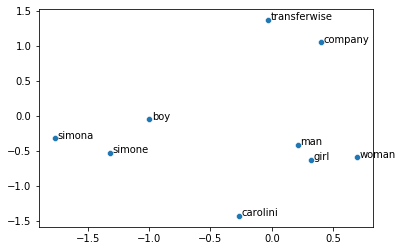

In [20]:
def plot_word2vec_representation(embeddings_dict: Type[Dict], words: Type[List]):
    x_1 = [i[0] for i in embeddings_dict.values()]
    x_2 = [i[1] for i in embeddings_dict.values()]

    ax = sns.scatterplot(x=x_1, y=x_2)

    for word, x, y in zip(words, x_1, x_2):
        ax.text(x+.02, y, word)

plot_word2vec_representation(embeddings_dict, words)